# [An Introduction to SHAP Values and Machine Learning Interpretability](https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability)

In [ ]:
!pip install shap

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
shap.initjs()

customer = pd.read_csv("/content/drive/MyDrive/ProductStar/customer_churn/customer_churn.csv")
customer.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.75      0.60      0.67         5

    accuracy                           0.90        30
   macro avg       0.84      0.78      0.80        30
weighted avg       0.89      0.90      0.90        30



# SHAP

In [ ]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

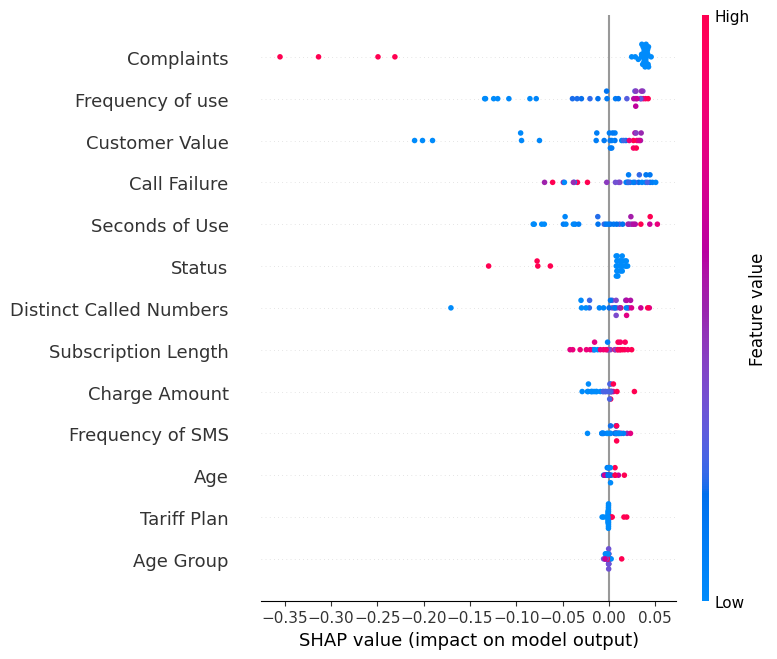

In [ ]:
shap.summary_plot(shap_values[:, :, 0], X_test)

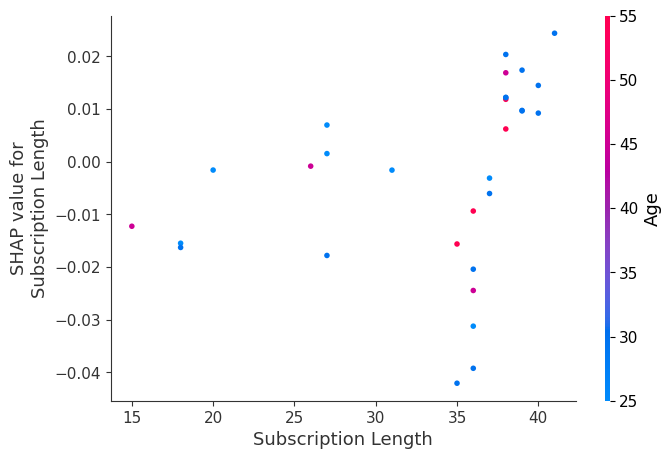

In [ ]:
shap.dependence_plot("Subscription Length", shap_values[:, :, 0], X_test,interaction_index="Age")

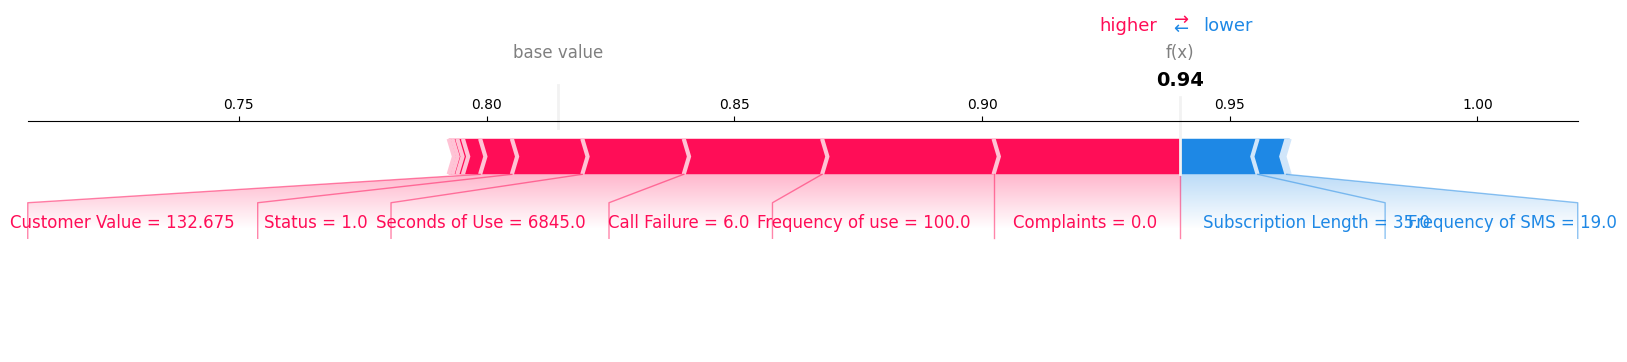

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[:, :, 0][0,:], X_test.iloc[0, :], matplotlib = True)

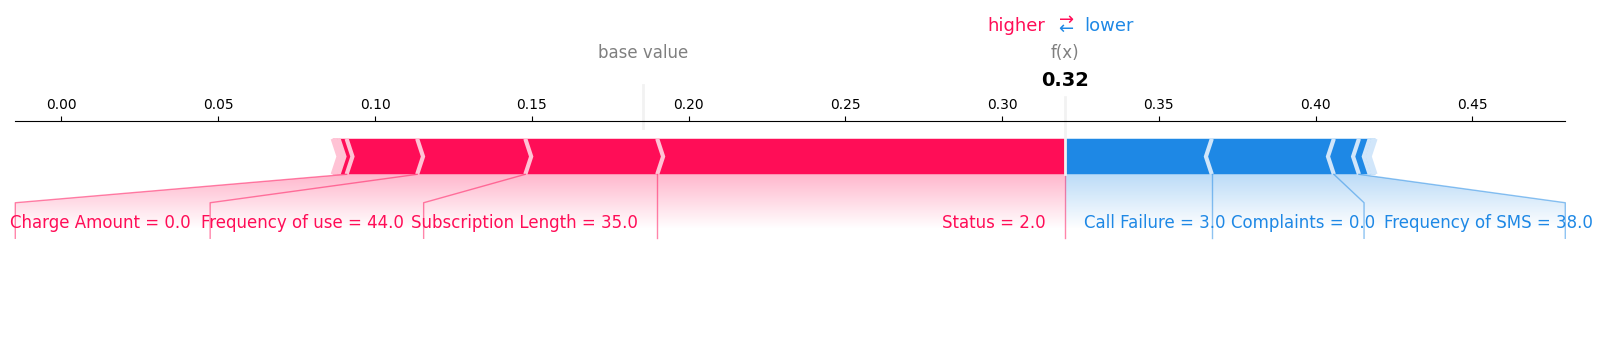

In [ ]:
shap.plots.force(explainer.expected_value[1], shap_values[:, :, 1][6, :], X_test.iloc[6, :],matplotlib = True)

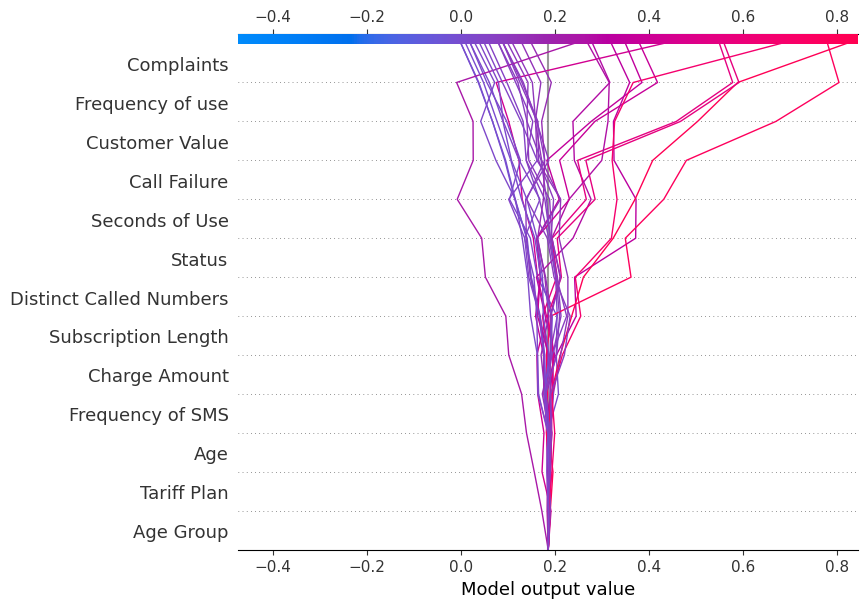

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[:, :, 1], X_test.columns)

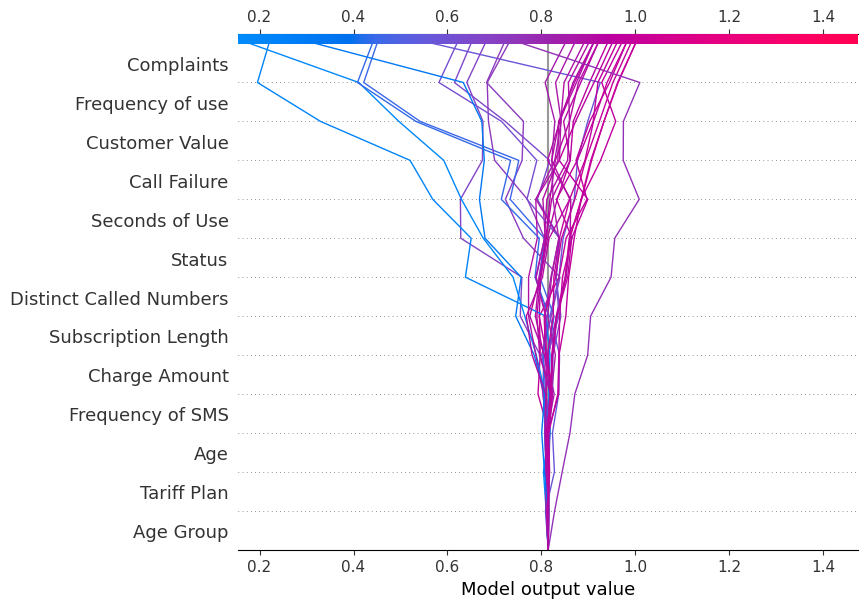

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[:, :, 0], X_test.columns)

# LIME

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
# creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns,
            class_names=['0', '1'], mode='classification')

In [ ]:
# obtaining the explanation
explanation = lime_explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=clf.predict_proba, top_labels=2, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
